In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
import seml
import seaborn.objects as so
import mplscience

%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
seml_run = "moscot_align"
results = seml.get_results(seml_run, to_data_frame=True)
configs = seml.get_results(
    seml_run,
)

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

In [5]:
results = results[results["config.model.tool.type"] != "moscot"].copy()

In [6]:
seml_run = "moscot_paste"
results2 = seml.get_results(seml_run, to_data_frame=True)
configs2 = seml.get_results(
    seml_run,
)

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

In [7]:
seml_run = "moscot_map2"
results3 = seml.get_results(seml_run, to_data_frame=True)
configs3 = seml.get_results(
    seml_run,
)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [8]:
results = pd.concat([results, results2, results3])

In [9]:
results.columns

Index(['_id', 'config.overwrite', 'config.db_collection',
       'config.data.dataset.adata', 'config.data.dataset.batch',
       'config.data.dataset.fraction', 'config.data.dataset.seeds',
       'config.model.solver.alpha', 'config.model.solver.epsilon',
       'config.model.solver.rank', 'config.model.tool.type',
       'config.train.training.output', 'config.train.training.reference_key',
       'config.seed', 'result.mse', 'result.time', 'result.n_obs',
       'result.n_var', 'config.model.solver.kernel', 'config.model.solver.lr',
       'config.model.solver.n_epochs', 'config.model.solver.dissimilarity',
       'config.model.solver.norm'],
      dtype='object')

In [10]:
columns = [
    "config.model.solver.alpha",
    "config.model.solver.epsilon",
    "config.model.solver.rank",
    "config.model.tool.type",
    "config.model.solver.kernel",
    "config.model.solver.lr",
    "config.model.solver.n_epochs",
    "config.model.solver.dissimilarity",
    "config.model.solver.norm",
    "config.model.tool.type",
]
results["unique_config"] = results[columns].apply(
    lambda x: "".join(str(x)).replace(" ", ""), axis=1, raw=True
)

In [11]:
results["config.model.tool.type"].unique()

array(['gpsa', 'paste'], dtype=object)

In [8]:
results["unique_config"]

0          [0.10.001-1.0'moscot'nannannannannan'moscot']
1          [0.10.001-1.0'moscot'nannannannannan'moscot']
2          [0.10.001-1.0'moscot'nannannannannan'moscot']
3         [0.10.001100.0'moscot'nannannannannan'moscot']
4         [0.10.001100.0'moscot'nannannannannan'moscot']
                             ...                        
355    [0.9nannan'paste'nannannan'euclidean'True'paste']
356    [0.9nannan'paste'nannannan'euclidean'True'paste']
357    [0.9nannan'paste'nannannan'euclidean'False'pas...
358    [0.9nannan'paste'nannannan'euclidean'False'pas...
359    [0.9nannan'paste'nannannan'euclidean'False'pas...
Name: unique_config, Length: 1224, dtype: object

In [9]:
cols = [
    "unique_config",
    "result.mse",
    "result.time",
    "result.n_obs",
    "result.n_var",
    "config.data.dataset.batch",
    "config.data.dataset.fraction",
    "config.data.dataset.seeds",
    "config.model.tool.type",
]
rename_cols = [
    "config",
    "mse",
    "time",
    "n_obs",
    "n_var",
    "batch",
    "fraction",
    "seeds",
    "method",
]
final_df = results[cols].rename(columns={k: v for k, v in zip(cols, rename_cols)})
final_df

,config,mse,time,n_obs,n_var,batch,fraction,seeds,method
0,[0.10.001-1.0'moscot'nannannannannan'moscot'],0.047985,13.410636,557,500,1,0.7,326,moscot
1,[0.10.001-1.0'moscot'nannannannannan'moscot'],0.044649,13.231855,560,500,1,0.7,403,moscot
2,[0.10.001-1.0'moscot'nannannannannan'moscot'],0.037396,14.448722,559,500,1,0.7,316,moscot
3,[0.10.001100.0'moscot'nannannannannan'moscot'],0.019608,42.859563,557,500,1,0.7,326,moscot
4,[0.10.001100.0'moscot'nannannannannan'moscot'],0.016535,40.619770,560,500,1,0.7,403,moscot
...,...,...,...,...,...,...,...,...,...
355,[0.9nannan'paste'nannannan'euclidean'True'paste'],0.290010,1191.101341,800,500,4,1.0,403,paste
356,[0.9nannan'paste'nannannan'euclidean'True'paste'],0.003536,1059.166651,800,500,4,1.0,316,paste
357,[0.9nannan'paste'nannannan'euclidean'False'pas...,0.003006,1060.693672,800,500,4,1.0,326,paste
358,[0.9nannan'paste'nannannan'euclidean'False'pas...,0.030105,973.923799,800,500,4,1.0,403,paste


In [10]:
best_config = []
for d in final_df.batch.unique():
    for m in final_df.method.unique():
        for f in final_df.fraction.unique():
            cond = (
                (final_df.method == m)
                & (final_df.batch == d)
                & (final_df.fraction == f)
            )
            temp_df = final_df[cond].copy()
            conf = (
                temp_df[["config", "mse"]]
                .groupby(["config"])
                .median()
                .reset_index()
                .sort_values(by="mse", ascending=False)
                .reset_index(drop=True)
                .config[0]
            )
            best_config.append(temp_df[temp_df.config == conf].copy())
            # best_config.append()

In [11]:
plot_df = pd.concat(best_config)
plot_df

,config,mse,time,n_obs,n_var,batch,fraction,seeds,method
0,[0.10.001-1.0'moscot'nannannannannan'moscot'],0.047985,13.410636,557,500,1,0.7,326,moscot
1,[0.10.001-1.0'moscot'nannannannannan'moscot'],0.044649,13.231855,560,500,1,0.7,403,moscot
2,[0.10.001-1.0'moscot'nannannannannan'moscot'],0.037396,14.448722,559,500,1,0.7,316,moscot
36,[0.10.001-1.0'moscot'nannannannannan'moscot'],0.013528,17.861232,711,500,1,0.9,326,moscot
37,[0.10.001-1.0'moscot'nannannannannan'moscot'],0.014754,20.113461,726,500,1,0.9,403,moscot
...,...,...,...,...,...,...,...,...,...
322,[0.5nannan'paste'nannannan'euclidean'False'pas...,0.008601,1131.513534,726,500,4,0.9,403,paste
323,[0.5nannan'paste'nannannan'euclidean'False'pas...,0.003693,1204.580054,716,500,4,0.9,316,paste
339,[0.2nannan'paste'nannannan'euclidean'False'pas...,0.067679,1248.425517,800,500,4,1.0,326,paste
340,[0.2nannan'paste'nannannan'euclidean'False'pas...,0.003160,1251.814744,800,500,4,1.0,403,paste


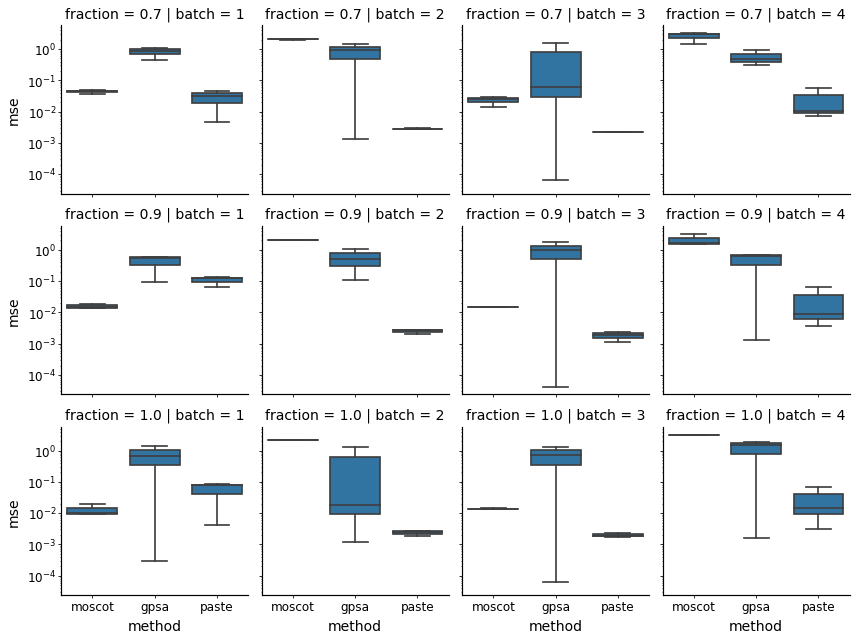

In [12]:
mplscience.set_style()
# palette = "deep"

# sc.set_figure_params(figsize=(3, 3), dpi=100)
# fig, axs = plt.subplots(1, 1, figsize=(4, 3), dpi=200)


def fixed_boxplot(x, y, *args, label=None, **kwargs):
    sns.boxplot(x=x, y=y, *args, **kwargs, labels=[label]).set_yscale("log")


g = sns.FacetGrid(plot_df, col="batch", row="fraction")
g.map(fixed_boxplot, "method", "mse")
# And you can do swarmplot on top
# g.map(sns.swarmplot, "method", "mse", color="0.25")

# g = sns.boxplot(
#     data=plot_df,
#     x="method",
#     y="mse",
#     hue="fraction",
#     dodge=True,
#     # palette=palette,
# )
# plt.xscale("log", basex=2)
# g.set_yscale("log")
# handles, labels = axs.get_legend_handles_labels()
# labels = ["0.1", "0.5", "0.9"]

# axs.legend(
#     handles,
#     labels,
#     title="alpha",
#     loc="center left",
#     bbox_to_anchor=(1, 0.5),
#     frameon=True,
#     fontsize=16,
# )
# axs.set_ylabel("mse", fontsize=18)

# axs.set_xlabel("", fontsize=18)
# axs.set_ylabel("mse", fontsize=18)
# axs.tick_params(axis="both", which="major", labelsize=18)
# axs.set_title(r"mse for spatial coordinates", fontsize=20)
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

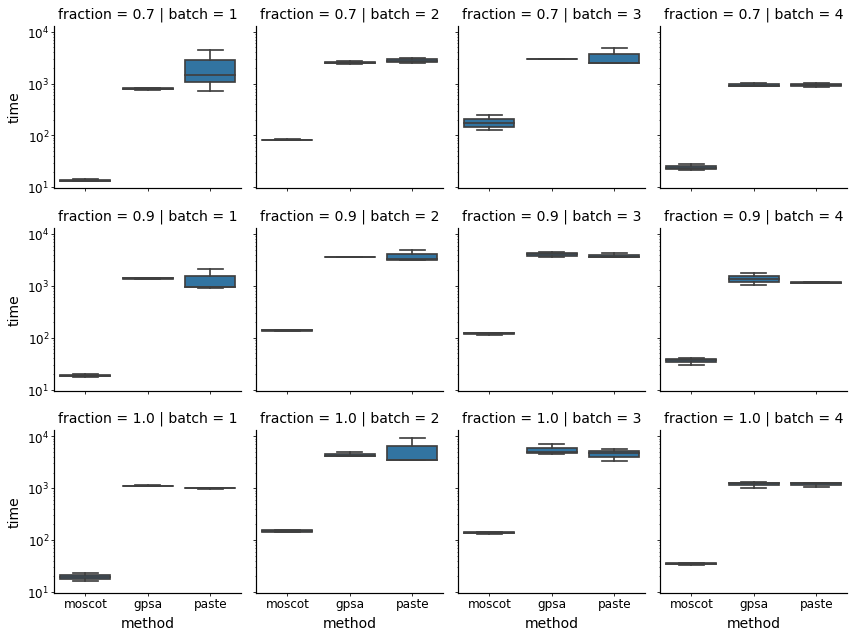

In [13]:
mplscience.set_style()
# palette = "deep"

# sc.set_figure_params(figsize=(3, 3), dpi=100)
# fig, axs = plt.subplots(1, 1, figsize=(4, 3), dpi=200)


def fixed_boxplot(x, y, *args, label=None, **kwargs):
    sns.boxplot(x=x, y=y, *args, **kwargs, labels=[label]).set_yscale("log")


g = sns.FacetGrid(plot_df, col="batch", row="fraction")
g.map(fixed_boxplot, "method", "time")

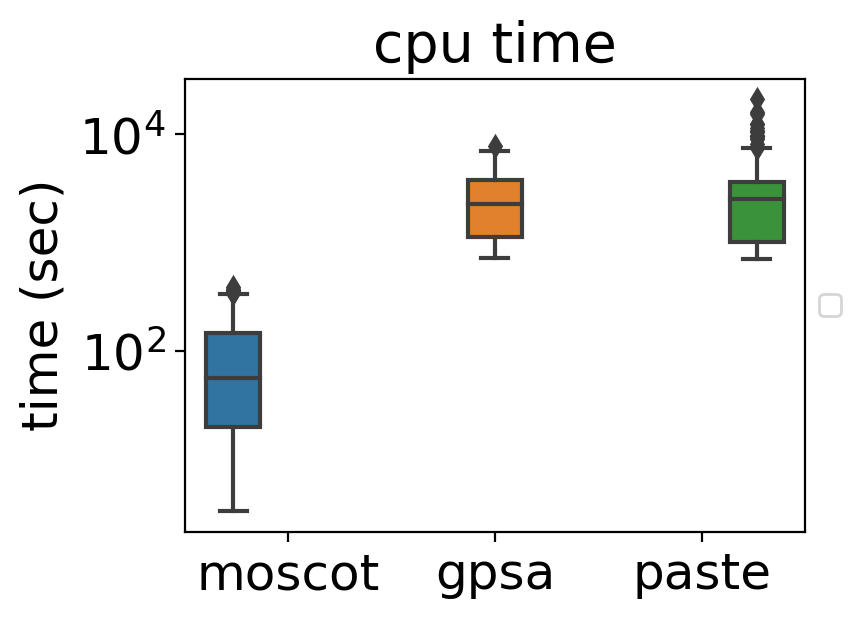

In [27]:
cond = (results["config.data.dataset.fraction"] == 0.5) & (
    results["config.data.dataset.batch"] == 3
)
# cond = results["config.data.dataset.fraction"] == 0.9

palette = "deep"

# sc.set_figure_params(figsize=(3, 3), dpi=100)
fig, axs = plt.subplots(1, 1, figsize=(4, 3), dpi=200)
g = sns.boxplot(
    data=results,  # [cond],
    x="config.model.tool.type",
    y="result.time",
    hue="config.model.tool.type",
    # palette=palette,
)
g.set_yscale("log")
# plt.xscale("log", basex=2)
# plt.yscale("log", basey=2)
# handles, labels = axs.get_legend_handles_labels()
# labels = ["0.1", "0.5", "0.9"]

# axs.legend(
#     handles,
#     labels,
#     title="alpha",
#     loc="center left",
#     bbox_to_anchor=(1, 0.5),
#     frameon=True,
#     fontsize=16,
# )
# axs.set_ylabel("mse", fontsize=18)

axs.set_xlabel("", fontsize=18)
axs.set_ylabel("time (sec)", fontsize=18)
axs.tick_params(axis="both", which="major", labelsize=18)
axs.set_title(r"cpu time", fontsize=20)
plt.legend("", loc="center left", bbox_to_anchor=(1, 0.5))

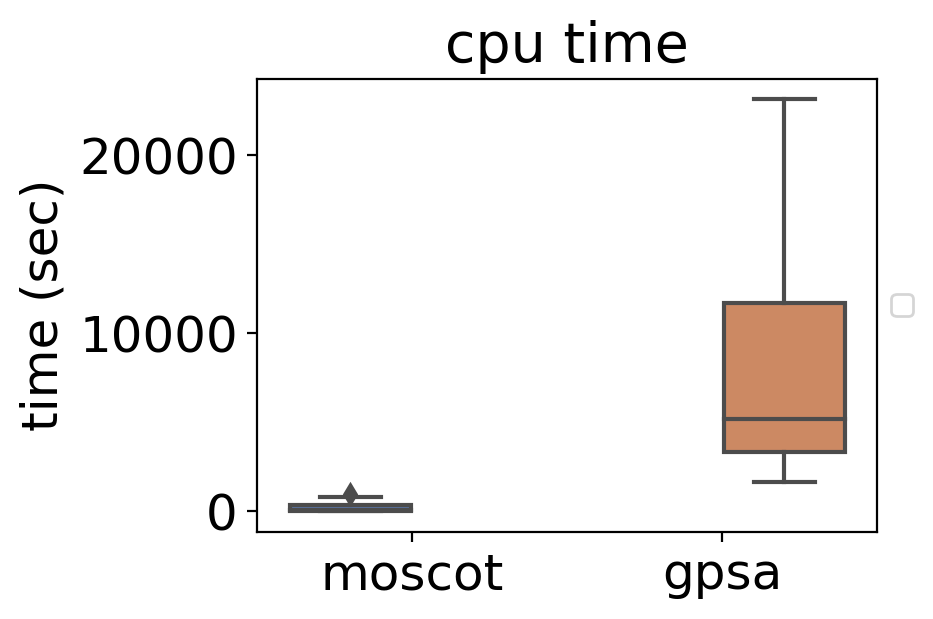

In [69]:
cond = (results["config.data.dataset.fraction"] == 0.5) & (
    results["config.data.dataset.batch"] == 3
)
# cond = results["config.data.dataset.fraction"] == 0.9

palette = "deep"

# sc.set_figure_params(figsize=(3, 3), dpi=100)
fig, axs = plt.subplots(1, 1, figsize=(4, 3), dpi=200)
sns.boxplot(
    data=results,  # [cond],
    x="config.model.tool.type",
    y="result.time",
    hue="config.model.tool.type",
    palette=palette,
)
# plt.xscale("log", basex=2)
# plt.yscale("log", basey=2)
# handles, labels = axs.get_legend_handles_labels()
# labels = ["0.1", "0.5", "0.9"]

# axs.legend(
#     handles,
#     labels,
#     title="alpha",
#     loc="center left",
#     bbox_to_anchor=(1, 0.5),
#     frameon=True,
#     fontsize=16,
# )
# axs.set_ylabel("mse", fontsize=18)

axs.set_xlabel("", fontsize=18)
axs.set_ylabel("time (sec)", fontsize=18)
axs.tick_params(axis="both", which="major", labelsize=18)
axs.set_title(r"cpu time", fontsize=20)
plt.legend("", loc="center left", bbox_to_anchor=(1, 0.5))

In [76]:
results["result.n_obs"].min()

390

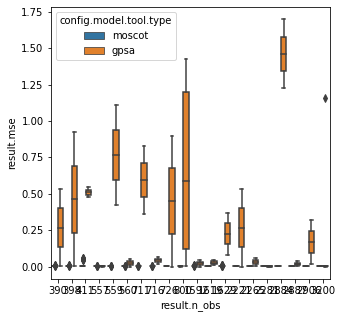

In [51]:
cond = results["config.data.dataset.fraction"] == 0.9  # & (
# results["config.data.dataset.batch"] == 2
# )
# aggregate_metrics = {
#     c: ["min", "max", "mean", np.std] for c in ["result.mse", "result.time"]
# }
# aggregate_metrics.update(
#     {
#         "result.n_obs": "first",
#         "result.n_var": "first",
#     }
# )
# agg_res = results[cond].groupby(["config.model.tool.type"])  # .agg(aggregate_metrics)
# agg_res.columns = ["_".join(a) for a in agg_res.columns.to_flat_index()]
# agg_res.reset_index(inplace=True, drop=False)
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

sns.boxplot(
    data=results,
    x="result.n_obs",
    y="result.mse",
    hue="config.model.tool.type",
    ax=axs,
)
handles, labels = axs.get_legend_handles_labels()
labels = ["0.1", "0.5", "0.9"]
# sns.regplot(
#     data=results[results["config.model.tool.type"] == "moscot"],
#     x="result.n_obs",
#     y="result.mse",
#     order=2,
#     # hue="config.model.tool.type",
#     ax=axs,
# )
# sns.regplot(
#     data=results[results["config.model.tool.type"] == "gpsa"],
#     x="result.n_obs",
#     y="result.mse",
#     order=1,
#     # hue="config.model.tool.type",
#     ax=axs,
# )
# sns.pointplot(
#     data=results,  # [cond],
#     x="result.n_obs",
#     y="result.mse",
#     hue="config.model.tool.type",
#     linestyles="",
#     ax=axs,
# )
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

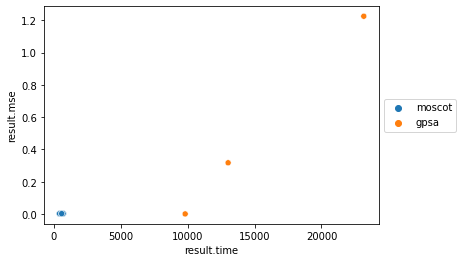

In [9]:

# sc.set_figure_params(figsize=(3, 3), dpi=100)


Text(0.5, 1.0, 'time of spatial mapping')

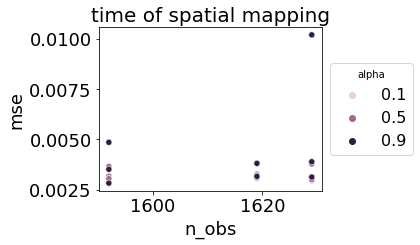

In [12]:
cond = (results["config.data.dataset.fraction"] == 0.5) & (
    results["config.data.dataset.batch"] == 2
)
# cond = results["config.data.dataset.fraction"] == 0.9

palette = "deep"

# sc.set_figure_params(figsize=(3, 3), dpi=100)
fig, axs = plt.subplots(1, 1, figsize=(4, 3))
sns.scatterplot(
    data=results[cond],
    x="result.n_obs",
    y="result.mse",
    hue="config.model.solver.alpha",
)
# plt.xscale("log", basex=2)
# plt.yscale("log", basey=2)
handles, labels = axs.get_legend_handles_labels()
labels = ["0.1", "0.5", "0.9"]

axs.legend(
    handles,
    labels,
    title="alpha",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=True,
    fontsize=16,
)
axs.set_ylabel("mse", fontsize=18)

axs.set_xlabel("n_obs", fontsize=18)
axs.tick_params(axis="both", which="major", labelsize=18)
axs.set_title(r"time of spatial mapping", fontsize=20)
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='config.model.tool.type', ylabel='result.time'>

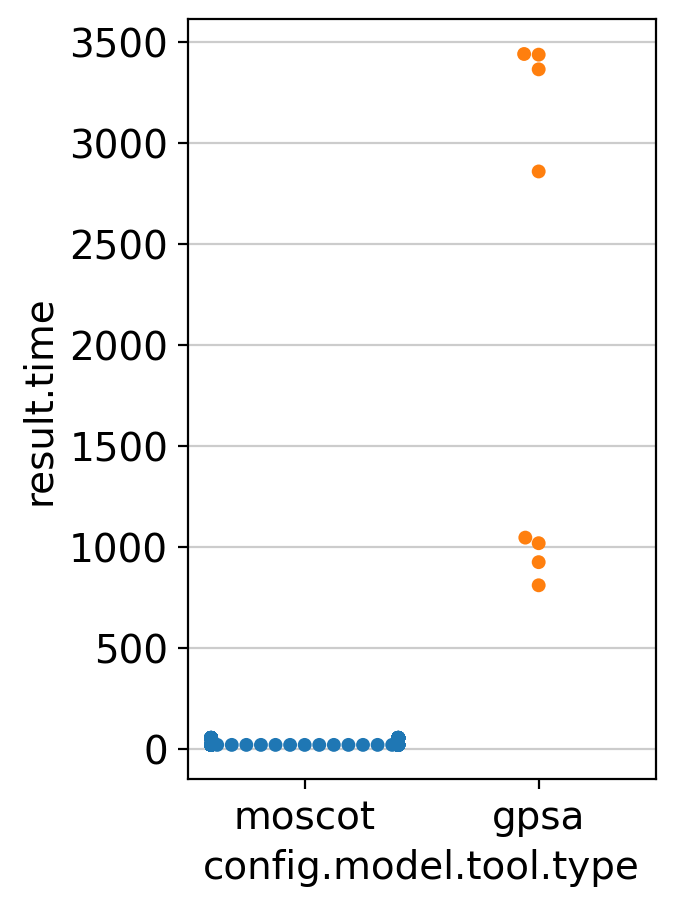

In [16]:
sc.set_figure_params(figsize=(3, 5), dpi=100)
sns.swarmplot(data=results, x="config.model.tool.type", y="result.time")

In [ ]:
sc.set_figure_params(figsize=(3, 3), dpi=100)
sns.swarmplot(
    data=results,
    x="result.n_obs",
    y="result.mse",
    hue="config.model.solver.alpha",
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))


KeyboardInterrupt



Error in callback <function flush_figures at 0x7f98f1ea7af0> (for post_execute):


/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


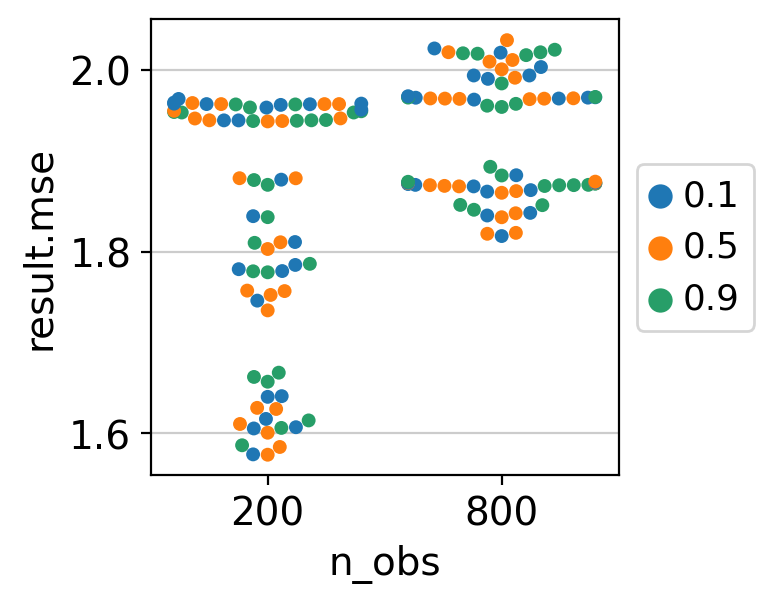

In [20]:
sc.set_figure_params(figsize=(3, 3), dpi=100)
sns.swarmplot(
    data=results,
    x="n_obs",
    y="result.mse",
    hue="config.model.solver.alpha",
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


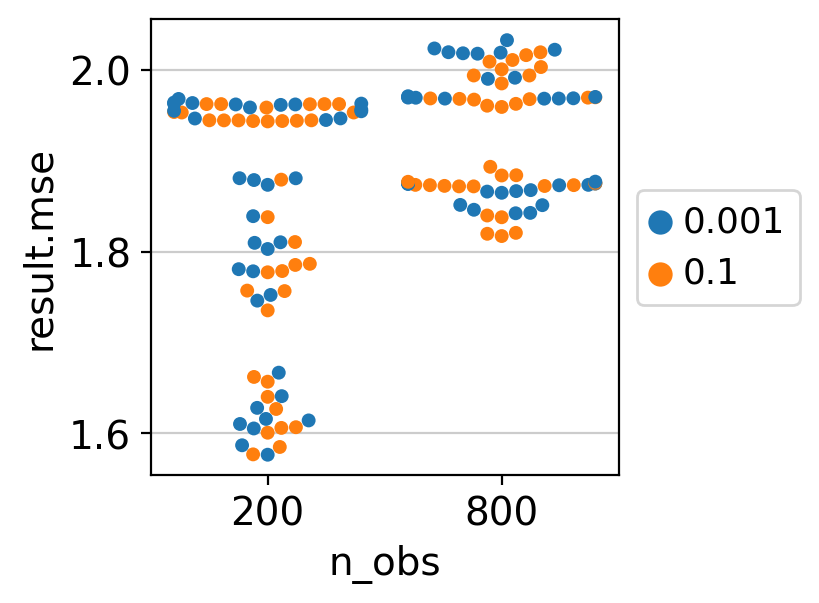

In [21]:
sc.set_figure_params(figsize=(3, 3), dpi=100)
sns.swarmplot(
    data=results,
    x="n_obs",
    y="result.mse",
    hue="config.model.solver.epsilon",
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [2]:
adata = sc.read(
    "/home/icb/giovanni.palla/code/spatial-alignment/examples/synthetic_data.h5ad"
)

In [3]:
adata.obs_names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '190', '191', '192', '193', '194', '195', '196', '197', '198', '199'],
      dtype='object', length=200)

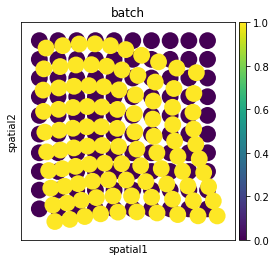

In [4]:
sc.pl.spatial(adata, spot_size=1, color="batch")

In [5]:
sys.path.append("/home/icb/giovanni.palla/code/spatial-alignment")
sys.path.append("/home/icb/giovanni.palla/code/spatial-alignment/data")
from data.simulated.generate_twod_data import (
    generate_twod_data,
    generate_twod_data_partial_overlap,
)
from data.simulated.generate_oned_data import generate_oned_data_gp_warp

In [6]:
from itertools import product
from sklearn.preprocessing import StandardScaler
from anndata import AnnData

In [7]:
n_views = [1]
n_outputs = [500]
grid_size = [10, 20]
n_latent_gps = [5, 50]
kernel_lengthscale = [5, 10]
adata_list = []
for el in product(n_views, n_outputs, grid_size, n_latent_gps, kernel_lengthscale):
    n_views, n_outputs, grid_size, n_latent_gps, kernel_lengthscale = el
    X, Y, n_samples_list, view_idx = generate_twod_data(
        n_views=n_views,
        n_outputs=n_outputs,
        grid_size=grid_size,
        n_latent_gps=n_latent_gps,
        kernel_lengthscale=kernel_lengthscale,
        kernel_variance=1,
    )
    X = StandardScaler().fit_transform(X)
    adata = AnnData(Y)

    adata.obsm["spatial"] = X
    batch = np.ones(adata.shape[0])
    batch[view_idx[0]] = 0
    adata.obs["batch"] = pd.Categorical(batch.astype(int))
    adata.obs["idx"] = np.hstack([view_idx[0], view_idx[0]])
    # sc.pp.subsample(adata, fraction=0.9)
    adata.obs_names_make_unique()
    adata_list.append(adata)

In [8]:
import anndata as ad

adata = ad.concat(adata_list, label="synth_batch")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Trying to set attribute `._uns` of view, copying.


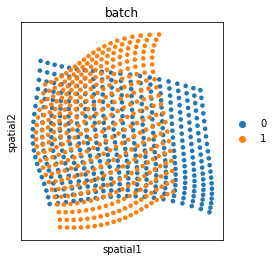

In [9]:
sc.pl.spatial(adata[adata.obs.synth_batch == "6"], spot_size=0.1, color="batch")

In [10]:
adata.write("/lustre/groups/ml01/workspace/giovanni.palla/moscot/data/alignment.h5ad")